# **Installation des packages et chargement**

In [ ]:
install.packages("plyr")
install.packages("spls")
install.packages("subselect")
install.packages("R.utils")
install.packages("caret")
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pls’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ISwR’, ‘corpcor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Warning message in install.packages("caret"):
“installation of package ‘clock’ had non

chargements des package importants

In [ ]:
library(ggplot2)
library(dplyr)
library(caret)
library(MASS)
library(leaps)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library(caret): there is no package called ‘caret’


# charger et visualiser les donnée


In [ ]:
# Charger les données
data <- read.csv('../Data/BostonHousing.csv')

# Exploration initiale des données
print("head")
print(head(data)) #visualiser les données

print("\n Sumary")
print(summary(data)) #voir la description des donnée min max les equart interquatile , le moyenne la médiane

print("\n data")
print(str(data)) # voir dimension et type des variables

Warning message in file(file, "rt"):
“cannot open file 'BostonHousing.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


#Traitement valeur manquante , abérante et incohérente

etant donnée qu'ont a pas les méthadonné du dataset et lors de la verification des types tout correspond je n'est pas fait d'analyse sur ces deux caractéristique

In [ ]:
# # Gestion des valeurs manquantes
print(colSums(is.na(data))) #voir igne ou ils y a de valeur manquante

     CRIM        ZN     INDUS      CHAS       NOX        RM       AGE       DIS 
        0         0         0         0         0         0         0         0 
      RAD   PTRATIO     LSTAT      MEDV CAT..MEDV 
        0         0         0         0         0 


In [ ]:
print(str(data))

'data.frame':	506 obs. of  13 variables:
 $ CRIM     : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX      : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM       : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS      : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD      : int  1 2 2 3 3 3 5 5 5 5 ...
 $ PTRATIO  : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ LSTAT    : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV     : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ CAT..MEDV: int  0 0 1 1 1 0 0 0 0 0 ...
NULL


# Correlation des différentes variables

In [ ]:
# Calculer la matrice de corrélation pour CRIM, CHAS et RM
cor_matrix <- cor(boston_train[c("CRIM", "CHAS", "RM")])

# Afficher la matrice de corrélation
print(cor_matrix)


            CRIM        CHAS         RM
CRIM  1.00000000 -0.07201227 -0.2222185
CHAS -0.07201227  1.00000000  0.0716118
RM   -0.22221847  0.07161180  1.0000000


In [ ]:
# Calcul de la matrice de corrélation
cor_matrix <- cor(data[c("INDUS", "NOX", "TAX")])

# Affichage de la matrice de corrélation
print(cor_matrix)


          INDUS       NOX       TAX
INDUS 1.0000000 0.7636514 0.7207602
NOX   0.7636514 1.0000000 0.6680232
TAX   0.7207602 0.6680232 1.0000000


In [ ]:
# Sélectionner les prédicteurs numériques (hypothétiquement nommés ici)
numeric_predictors <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
                        "AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT")

# Calculer la matrice de corrélation
cor_matrix <- cor(data[, numeric_predictors])

# Afficher la matrice de corrélation
print(cor_matrix)

               CRIM          ZN       INDUS         CHAS         NOX
CRIM     1.00000000 -0.20046922  0.40658341 -0.055891582  0.42097171
ZN      -0.20046922  1.00000000 -0.53382819 -0.042696719 -0.51660371
INDUS    0.40658341 -0.53382819  1.00000000  0.062938027  0.76365145
CHAS    -0.05589158 -0.04269672  0.06293803  1.000000000  0.09120281
NOX      0.42097171 -0.51660371  0.76365145  0.091202807  1.00000000
RM      -0.21924670  0.31199059 -0.39167585  0.091251225 -0.30218819
AGE      0.35273425 -0.56953734  0.64477851  0.086517774  0.73147010
DIS     -0.37967009  0.66440822 -0.70802699 -0.099175780 -0.76923011
RAD      0.62550515 -0.31194783  0.59512927 -0.007368241  0.61144056
TAX      0.58276431 -0.31456332  0.72076018 -0.035586518  0.66802320
PTRATIO  0.28994558 -0.39167855  0.38324756 -0.121515174  0.18893268
LSTAT    0.45562148 -0.41299457  0.60379972 -0.053929298  0.59087892
                 RM         AGE         DIS          RAD         TAX    PTRATIO
CRIM    -0.21924670  0.

In [ ]:
# Suppression de la colonne TAX
data <- data[, !colnames(data) %in% "TAX"]

# Vérification des dimensions après suppression
dim(data)
print(str(data))

[1] 506  13

'data.frame':	506 obs. of  13 variables:
 $ CRIM     : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX      : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM       : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS      : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD      : int  1 2 2 3 3 3 5 5 5 5 ...
 $ PTRATIO  : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ LSTAT    : num  4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV     : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...
 $ CAT..MEDV: int  0 0 1 1 1 0 0 0 0 0 ...
NULL


In [ ]:
# Vérifier le nombre de valeurs uniques dans MEDV
unique_values <- unique(data$MEDV)
length(unique_values)


[1] 229

#Partitionnement en tain set et  test set

In [ ]:

#+++++++++++++++Partitionner les données en ensembles d'entraînement et de validation+

# Définir un seed pour la reproductibilité

set.seed(123)
n <- nrow(data)
train_indices <- sample(1:n, round(0.7*n), replace = FALSE)
boston_train <- data[train_indices, ]
boston_test <- data[-train_indices, ]
# Vérifier les dimensions des ensembles
dim(boston_train)
dim(boston_test)


[1] 354  14

[1] 152  14

# Ajuster le modèle de régression linéaire multiple

---


In [ ]:

#++++++++++++ Ajuster un modèle de régression linéaire multiple++++++++
#
model <- lm(MEDV ~ CRIM + CHAS + RM, data = boston_train)

# Afficher le résumé du modèle
summary(model)



Call:
lm(formula = MEDV ~ CRIM + CHAS + RM, data = boston_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.851  -2.959  -0.382   2.365  38.596 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -26.76051    3.16874  -8.445 8.21e-16 ***
CRIM         -0.23292    0.03608  -6.456 3.58e-10 ***
CHAS          5.53682    1.28391   4.312 2.10e-05 ***
RM            7.90845    0.49811  15.877  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.275 on 350 degrees of freedom
Multiple R-squared:  0.5278,	Adjusted R-squared:  0.5237 
F-statistic: 130.4 on 3 and 350 DF,  p-value: < 2.2e-16


(Intercept)        CRIM        CHAS          RM 
-26.7605140  -0.2329212   5.5368156   7.9084491

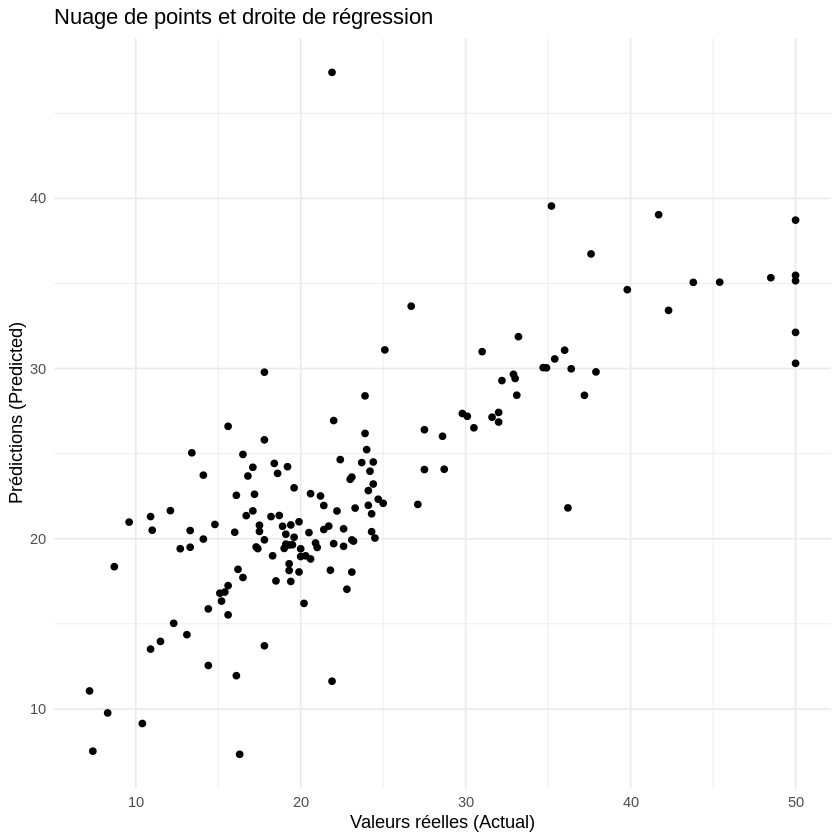

In [ ]:
# Faire des prédictions sur le jeu de test
predictions <- predict(model, newdata = boston_test)

# Créer un data frame avec les prédictions et les valeurs réelles
plot_data <- data.frame(
  Actual = boston_test$MEDV,
  Predicted = predictions
)

# Nuage de points et droite de régression
ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_point() +
  geom_abline(intercept = coef(model)[1], slope = coef(model)[2], color = "blue") +
  labs(x = "Valeurs réelles (Actual)", y = "Prédictions (Predicted)", title = "Nuage de points et droite de régression") +
  theme_minimal()

In [ ]:
# Équation du modèle : MEDV = intercept + coef(CRIM) * CRIM + coef(CHAS) * CHAS + coef(RM) * RM
coefficients(model)

(Intercept)        CRIM        CHAS          RM 
-26.7605140  -0.2329212   5.5368156   7.9084491

# Régression pas à pas

In [ ]:
# Définir le contrôle pour la régression pas à pas
control <- trainControl(method="cv", number=10)

# Régression pas à pas rétrograde
stepwise_model_backward <- train(MEDV ~ ., data = boston_train, method = "leapBackward", trControl = control)
stepwise_model_backward$finalModel

# Régression pas à pas progressive
stepwise_model_forward <- train(MEDV ~ ., data = boston_train, method = "leapForward", trControl = control)
stepwise_model_forward$finalModel

# Régression pas à pas bidirectionnelle
stepwise_model_both <- train(MEDV ~ ., data = boston_train, method = "leapSeq", trControl = control)
stepwise_model_both$finalModel

# Comparer les RMSE des modèles
predictions_backward <- predict(stepwise_model_backward, newdata = boston_test)
RMSE_backward <- sqrt(mean((boston_test$MEDV - predictions_backward)^2))

predictions_forward <- predict(stepwise_model_forward, newdata = boston_test)
RMSE_forward <- sqrt(mean((boston_test$MEDV - predictions_forward)^2))

predictions_both <- predict(stepwise_model_both, newdata = boston_test)
RMSE_both <- sqrt(mean((boston_test$MEDV - predictions_both)^2))



Subset selection object
13 Variables  (and intercept)
          Forced in Forced out
CRIM          FALSE      FALSE
ZN            FALSE      FALSE
INDUS         FALSE      FALSE
CHAS          FALSE      FALSE
NOX           FALSE      FALSE
RM            FALSE      FALSE
AGE           FALSE      FALSE
DIS           FALSE      FALSE
RAD           FALSE      FALSE
TAX           FALSE      FALSE
PTRATIO       FALSE      FALSE
LSTAT         FALSE      FALSE
CAT..MEDV     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: backward

Subset selection object
13 Variables  (and intercept)
          Forced in Forced out
CRIM          FALSE      FALSE
ZN            FALSE      FALSE
INDUS         FALSE      FALSE
CHAS          FALSE      FALSE
NOX           FALSE      FALSE
RM            FALSE      FALSE
AGE           FALSE      FALSE
DIS           FALSE      FALSE
RAD           FALSE      FALSE
TAX           FALSE      FALSE
PTRATIO       FALSE      FALSE
LSTAT         FALSE      FALSE
CAT..MEDV     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: forward

Subset selection object
13 Variables  (and intercept)
          Forced in Forced out
CRIM          FALSE      FALSE
ZN            FALSE      FALSE
INDUS         FALSE      FALSE
CHAS          FALSE      FALSE
NOX           FALSE      FALSE
RM            FALSE      FALSE
AGE           FALSE      FALSE
DIS           FALSE      FALSE
RAD           FALSE      FALSE
TAX           FALSE      FALSE
PTRATIO       FALSE      FALSE
LSTAT         FALSE      FALSE
CAT..MEDV     FALSE      FALSE
1 subsets of each size up to 2
Selection Algorithm: 'sequential replacement'

RMSE Backward:  4.167967 
RMSE Forward:  4.122387 
RMSE Both:  4.223194 


 **RMSE**

---



In [ ]:
cat("RMSE Backward: ", RMSE_backward, "\n")
cat("RMSE Forward: ", RMSE_forward, "\n")
cat("RMSE Both: ", RMSE_both, "\n")


RMSE Backward:  4.167967 
RMSE Forward:  4.122387 
RMSE Both:  4.223194 


# PRÉDICTION AVEC L'EQUATION DE LA REGRESSION



In [ ]:
# Définir de nouvelles valeurs pour CRIM, CHAS et RM
new_data <- data.frame(CRIM = 0.1, CHAS = 0, RM = 6)


predicted_value <- -34.6706 - 0.0708 * new_data$CRIM + 3.2438 * new_data$CHAS + 8.1627 * new_data$RM

# Afficher la prédiction
predicted_value


[1] 14.29852

In [ ]:
# Valeur réelle (hypothétique, remplacez par la vraie valeur si disponible)
actual_value <- 15

# Calculer l'erreur de prédiction (RMSE)
RMSE <- sqrt(mean((predicted_value - actual_value)^2))

# Afficher le RMSE
RMSE

[1] 0.70148